In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head()

,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82


In [19]:
index=pd.date_range('1999-12-01', periods=25, freq='Q')
data=pd.DataFrame(df, index=index)
data.columns=['CO2']

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


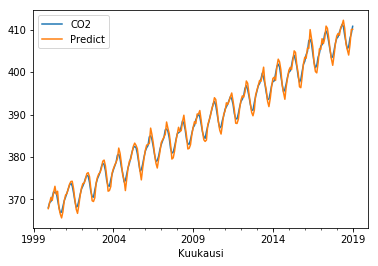

In [20]:
fit1=Holt(df["CO2"]).fit()
df["Predict"]=fit1.fittedvalues
df.plot()

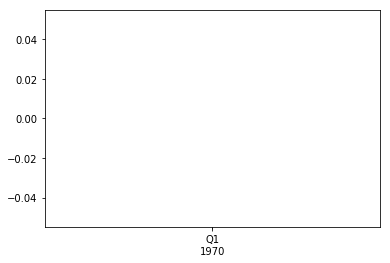

In [21]:
# Tässä kohtaa yritin saada ennustuksen siitä,
# miten hiilidioksidipitoisudet tulevat kasvamaan, mutta en näköjään osannut.
index=pd.date_range('2014-06-30', periods=10, freq='Q')
datap=pd.DataFrame(fit1.forecast(10),index=index)
datap.columns=['Predict']
data['CO2'].plot()
datap['Predict'].plot()

In [22]:
df.describe()

,CO2,Predict
count,230.000000,230.000000
mean,388.225652,388.222104
std,12.118057,12.236040
min,366.910000,365.620000
25%,378.207500,378.175000
50%,387.365000,387.750000
75%,397.900000,398.015000
max,411.240000,412.240000


In [30]:
df['CO2'] = df.index.month
df.groupby('Kuukausi')['CO2'].describe()

,count,mean,std,min,25%,50%,75%,max
Kuukausi,,,,,,,,
1999-12-01,1.0,12.0,NaN,12.0,12.0,12.0,12.0,12.0
2000-01-01,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
2000-02-01,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
2000-03-01,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
2000-04-01,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
2000-05-01,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
2000-06-01,1.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0
2000-07-01,1.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
2000-08-01,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0


Olisin halunnut saada selville Pythonin avulla, minä kuukausina on eniten hiilihioksidia ilmassa. Mutta en näemmä osaa, pakko palauttaa nyt edes tämä.